In [1]:
import sys, platform
import numpy as np, pandas as pd, matplotlib
import rasterio, statsmodels

print("Python:", sys.version.split()[0])
print("OS:", platform.platform())
print("numpy:", np.__version__)
print("pandas:", pd.__version__)
print("matplotlib:", matplotlib.__version__)
print("rasterio:", rasterio.__version__)
import statsmodels.api as sm
print("statsmodels:", sm.__version__)


Python: 3.12.4
OS: Windows-11-10.0.22631-SP0
numpy: 2.3.2
pandas: 2.3.1
matplotlib: 3.10.5
rasterio: 1.4.3
statsmodels: 0.14.5


In [2]:
#!pip install -q openeo rasterio numpy pandas matplotlib

In [3]:
import openeo

connection = openeo.connect("https://openeo.dataspace.copernicus.eu").authenticate_oidc()



Authenticated using refresh token.


# ATITLAN

In [4]:
lago_atitlan = {
    "west": -91.349, "east": -91.0702,
    "south": 14.5971, "north": 14.7648
}
lago_amatitlan = {
    "west": -90.66, "east": -90.58,
    "south": 14.43, "north": 14.51
}

fechas_atitlan = ["2025-02-01", "2025-02-05"]
fechas_amatitlan = ["2025-02-06", "2025-02-10"]

BANDS = ["B02","B03","B04","B08"]


In [5]:
atitlan_cube = connection.load_collection(
    "SENTINEL2_L2A",
    spatial_extent=lago_atitlan,
    temporal_extent=fechas_atitlan,
    bands=BANDS
)

atitlan_graph = atitlan_cube.save_result(format="GTIFF")

job = connection.create_job(atitlan_graph, title="S2 Atitlan bands B02,B03,B04,B08")
job.start_and_wait()

import os
os.makedirs("imgs", exist_ok=True)
job.download_results("imgs")



0:00:00 Job 'j-2508142233474992bab5d38f5c772723': send 'start'
0:00:13 Job 'j-2508142233474992bab5d38f5c772723': created (progress 0%)
0:00:18 Job 'j-2508142233474992bab5d38f5c772723': created (progress 0%)
0:00:25 Job 'j-2508142233474992bab5d38f5c772723': running (progress N/A)
0:00:33 Job 'j-2508142233474992bab5d38f5c772723': running (progress N/A)
0:00:43 Job 'j-2508142233474992bab5d38f5c772723': running (progress N/A)
0:00:56 Job 'j-2508142233474992bab5d38f5c772723': running (progress N/A)
0:01:11 Job 'j-2508142233474992bab5d38f5c772723': running (progress N/A)
0:01:31 Job 'j-2508142233474992bab5d38f5c772723': running (progress N/A)
0:01:55 Job 'j-2508142233474992bab5d38f5c772723': running (progress N/A)
0:02:25 Job 'j-2508142233474992bab5d38f5c772723': running (progress N/A)
0:03:03 Job 'j-2508142233474992bab5d38f5c772723': finished (progress 100%)


C:\Users\diego\AppData\Local\Temp\ipykernel_3492\2603477457.py:15: UserDeprecationWarning: Call to deprecated method download_results. (Instead use `BatchJob.get_results` and the more flexible download functionality of `JobResults`) -- Deprecated since version 0.4.10.
  job.download_results("imgs")
d:\cosas\programass\UVG\Data Science\Laboratorio 4\.venv\Lib\site-packages\openeo\rest\job.py:199: UserDeprecationWarning: Call to deprecated method get_result. (Use `BatchJob.get_results` instead.) -- Deprecated since version 0.4.10.
  return self.get_result().download_files(target)
d:\cosas\programass\UVG\Data Science\Laboratorio 4\.venv\Lib\site-packages\openeo\rest\job.py:203: UserDeprecationWarning: Call to deprecated class _Result. (Use `JobResults` instead) -- Deprecated since version 0.4.10.
  return _Result(self)


{WindowsPath('imgs/openEO_2025-02-02Z.tif'): {'bands': [{'eo:center_wavelength': 0.4924,
    'eo:common_name': 'blue',
    'name': 'B02'},
   {'eo:center_wavelength': 0.5598, 'eo:common_name': 'green', 'name': 'B03'},
   {'eo:center_wavelength': 0.6646, 'eo:common_name': 'red', 'name': 'B04'},
   {'eo:center_wavelength': 0.8328, 'eo:common_name': 'nir', 'name': 'B08'}],
  'eo:bands': [{'center_wavelength': 0.4924,
    'common_name': 'blue',
    'name': 'B02'},
   {'center_wavelength': 0.5598, 'common_name': 'green', 'name': 'B03'},
   {'center_wavelength': 0.6646, 'common_name': 'red', 'name': 'B04'},
   {'center_wavelength': 0.8328, 'common_name': 'nir', 'name': 'B08'}],
  'href': 'https://openeo.dataspace.copernicus.eu/openeo/1.2/jobs/j-2508142233474992bab5d38f5c772723/results/assets/YjIyZWRkM2YtNmY2NS00MTlhLWE2NmYtNmQzMzRkZTgyMzQ0/d9dc38b485c1474fbb0f6d0150748086/openEO_2025-02-02Z.tif?expires=1755815811',
  'proj:bbox': [677700, 1614410, 707890, 1633210],
  'proj:epsg': 32615,
  'p

In [6]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

ruta_tif_atitlan = max(Path("imgs").glob("*.tif"), key=lambda p: p.stat().st_mtime)

with rasterio.open(ruta_tif_atitlan) as src:
    bandas = src.read()
    nodata = src.nodata
    descs = list(src.descriptions) if src.descriptions else []

bandas.shape, nodata, descs


((4, 1880, 3019), -32768.0, ['B02', 'B03', 'B04', 'B08'])

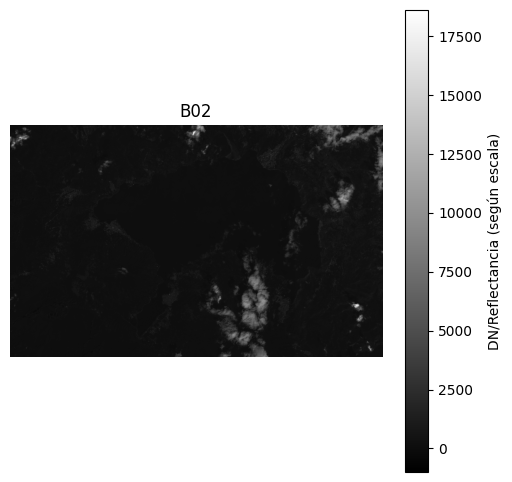

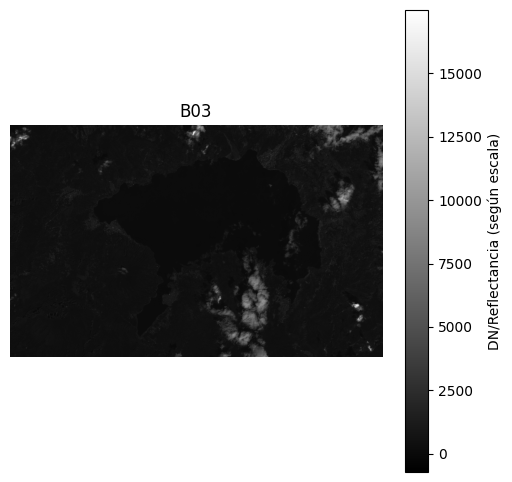

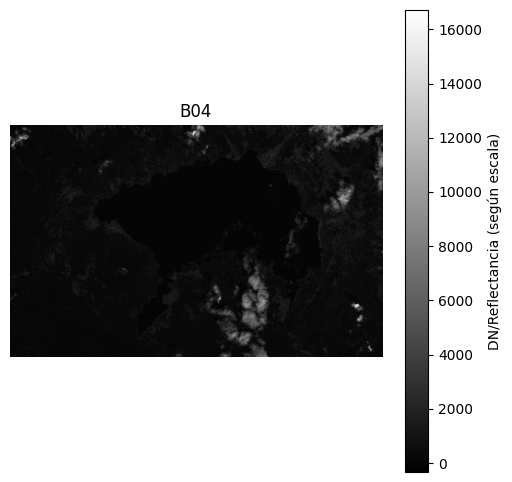

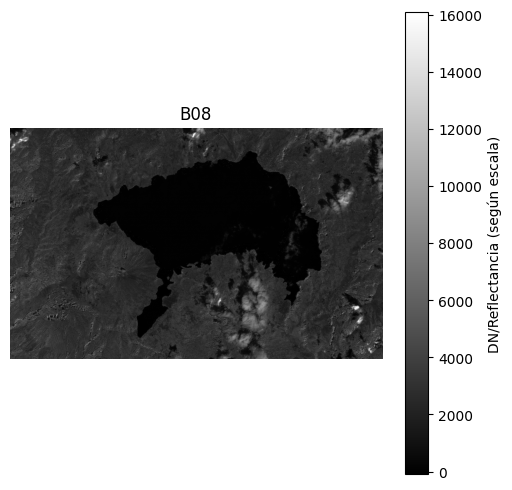

In [7]:
for i in range(bandas.shape[0]):
    plt.figure(figsize=(6,6))
    img = bandas[i].astype("float32")
    if nodata is not None:
        img = np.ma.masked_where(img == nodata, img)
    plt.imshow(img, cmap="gray")
    nombre = descs[i] if i < len(descs) and descs[i] else f"Banda {i+1}"
    plt.title(nombre)
    plt.axis('off')
    plt.colorbar(label="DN/Reflectancia (según escala)")
    plt.show()


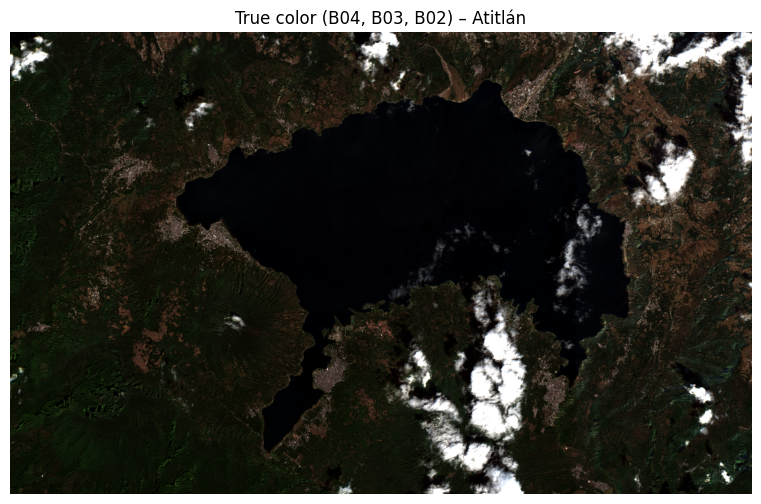

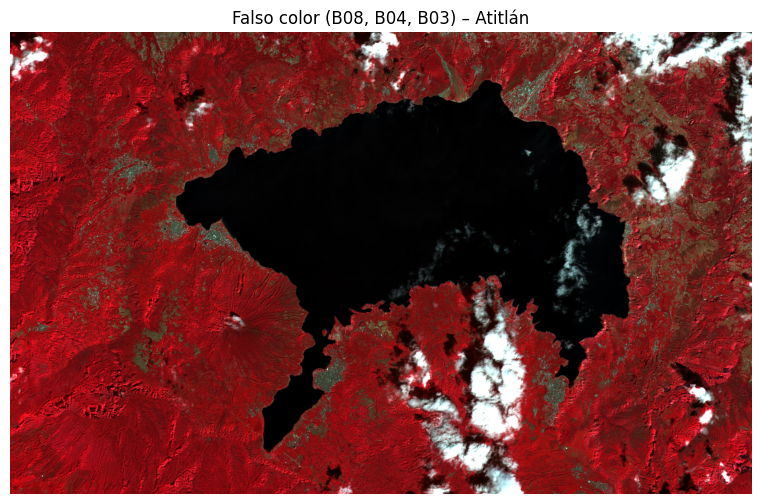

In [8]:
def normalize(b):
    b = b.astype("float32")
    valid = b[np.isfinite(b)]
    if valid.size == 0:
        return b
    p2, p98 = np.percentile(valid, (2, 98))
    return np.clip((b - p2) / (p98 - p2 + 1e-9), 0, 1)

blue  = bandas[0]
green = bandas[1]
red   = bandas[2]
nir   = bandas[3]

R = normalize(red)
G = normalize(green)
B = normalize(blue)

rgb_true = np.dstack([R, G, B])

plt.figure(figsize=(10,6))
plt.imshow(rgb_true)
plt.title("True color (B04, B03, B02) – Atitlán")
plt.axis('off')
plt.show()

N = normalize(nir)
rgb_false = np.dstack([N, R, G])

plt.figure(figsize=(10,6))
plt.imshow(rgb_false)
plt.title("Falso color (B08, B04, B03) – Atitlán")
plt.axis('off')
plt.show()


C:\Users\diego\AppData\Local\Temp\ipykernel_3492\417319843.py:9: RuntimeWarning: divide by zero encountered in divide
  (nir_f - red_f) / (nir_f + red_f)
C:\Users\diego\AppData\Local\Temp\ipykernel_3492\417319843.py:9: RuntimeWarning: invalid value encountered in divide
  (nir_f - red_f) / (nir_f + red_f)


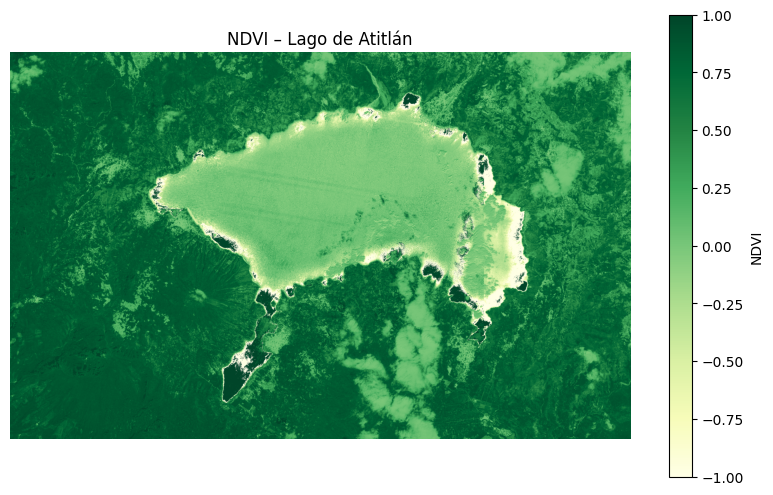

C:\Users\diego\AppData\Local\Temp\ipykernel_3492\417319843.py:21: RuntimeWarning: divide by zero encountered in divide
  (green_f - nir_f) / (green_f + nir_f)
C:\Users\diego\AppData\Local\Temp\ipykernel_3492\417319843.py:21: RuntimeWarning: invalid value encountered in divide
  (green_f - nir_f) / (green_f + nir_f)


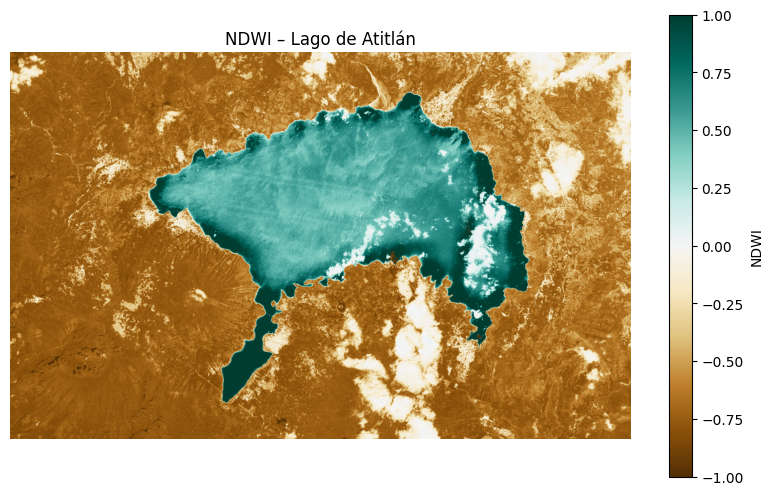

In [9]:
scale = 10000.0
red_f  = red.astype("float32")  / scale
nir_f  = nir.astype("float32")  / scale
green_f= green.astype("float32")/ scale
blue_f = blue.astype("float32") / scale

ndvi_atitlan = np.where(
    (nir_f + red_f) == 0, np.nan,
    (nir_f - red_f) / (nir_f + red_f)
)

plt.figure(figsize=(10,6))
plt.imshow(ndvi_atitlan, cmap='YlGn', vmin=-1, vmax=1)
plt.title("NDVI – Lago de Atitlán")
plt.colorbar(label="NDVI")
plt.axis('off')
plt.show()

ndwi_atitlan = np.where(
    (green_f + nir_f) == 0, np.nan,
    (green_f - nir_f) / (green_f + nir_f)
)

plt.figure(figsize=(10,6))
plt.imshow(ndwi_atitlan, cmap='BrBG', vmin=-1, vmax=1)
plt.title("NDWI – Lago de Atitlán")
plt.colorbar(label="NDWI")
plt.axis('off')
plt.show()


# AMATITLAN

In [10]:
amatitlan_cube = connection.load_collection(
    "SENTINEL2_L2A",
    spatial_extent=lago_amatitlan,
    temporal_extent=fechas_amatitlan,
    bands=BANDS
)

amatitlan_graph = amatitlan_cube.save_result(format="GTIFF")
job2 = connection.create_job(amatitlan_graph, title="S2 Amatitlan bands B02,B03,B04,B08")
job2.start_and_wait()

import os
os.makedirs("imgs", exist_ok=True)
job2.download_results("imgs")

ruta_tif_amatitlan = sorted(Path("imgs").glob("*.tif"), key=lambda p: p.stat().st_mtime)[-1]
ruta_tif_amatitlan


0:00:00 Job 'j-2508142238434e69834560715138cb8b': send 'start'
0:00:13 Job 'j-2508142238434e69834560715138cb8b': created (progress 0%)
0:00:19 Job 'j-2508142238434e69834560715138cb8b': created (progress 0%)
0:00:25 Job 'j-2508142238434e69834560715138cb8b': created (progress 0%)
0:00:33 Job 'j-2508142238434e69834560715138cb8b': running (progress N/A)
0:00:43 Job 'j-2508142238434e69834560715138cb8b': running (progress N/A)
0:00:56 Job 'j-2508142238434e69834560715138cb8b': running (progress N/A)
0:01:11 Job 'j-2508142238434e69834560715138cb8b': running (progress N/A)
0:01:31 Job 'j-2508142238434e69834560715138cb8b': finished (progress 100%)


C:\Users\diego\AppData\Local\Temp\ipykernel_3492\841192583.py:14: UserDeprecationWarning: Call to deprecated method download_results. (Instead use `BatchJob.get_results` and the more flexible download functionality of `JobResults`) -- Deprecated since version 0.4.10.
  job2.download_results("imgs")
d:\cosas\programass\UVG\Data Science\Laboratorio 4\.venv\Lib\site-packages\openeo\rest\job.py:199: UserDeprecationWarning: Call to deprecated method get_result. (Use `BatchJob.get_results` instead.) -- Deprecated since version 0.4.10.
  return self.get_result().download_files(target)
d:\cosas\programass\UVG\Data Science\Laboratorio 4\.venv\Lib\site-packages\openeo\rest\job.py:203: UserDeprecationWarning: Call to deprecated class _Result. (Use `JobResults` instead) -- Deprecated since version 0.4.10.
  return _Result(self)


WindowsPath('imgs/openEO_2025-02-07Z.tif')

In [11]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

ruta_tif_amatitlan = max(Path("imgs").glob("*.tif"), key=lambda p: p.stat().st_mtime)

with rasterio.open(ruta_tif_amatitlan) as src:
    bandas = src.read()
    nodata = src.nodata
    descs = list(src.descriptions) if src.descriptions else []

bandas.shape, nodata, descs


((4, 896, 873), -32768.0, ['B02', 'B03', 'B04', 'B08'])

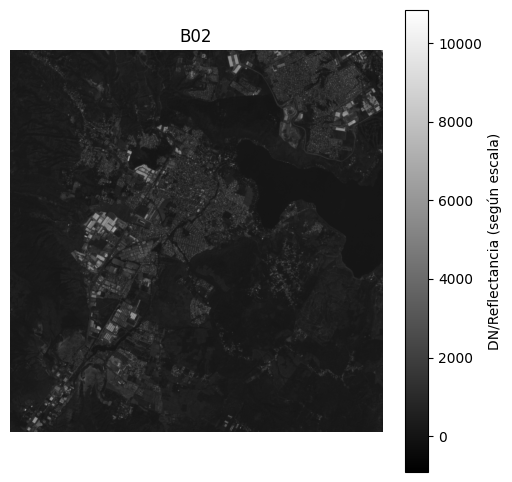

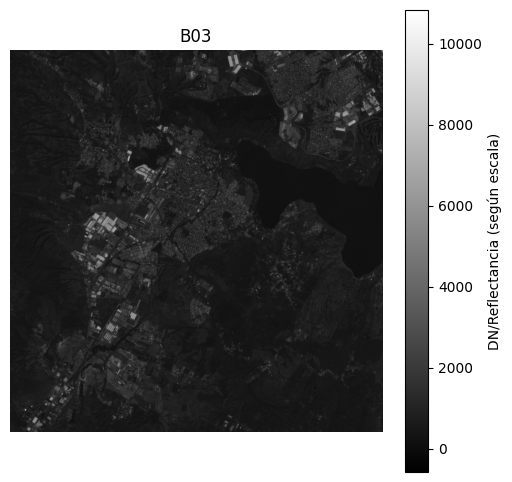

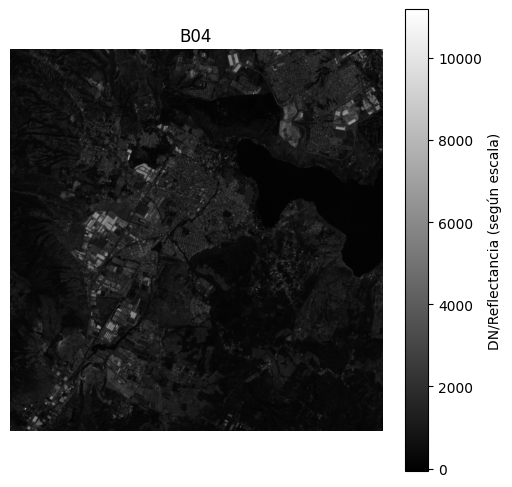

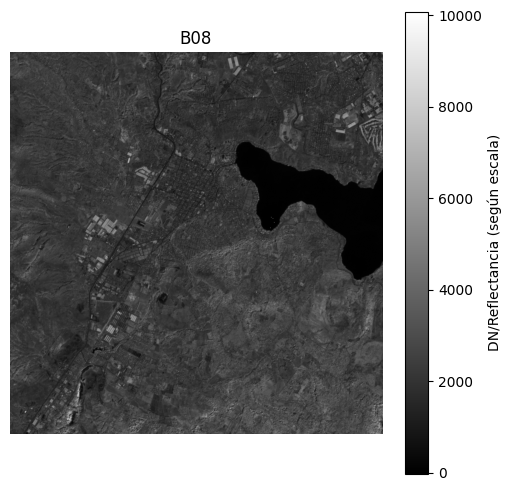

In [12]:
for i in range(bandas.shape[0]):
    plt.figure(figsize=(6,6))
    img = bandas[i].astype("float32")
    if nodata is not None:
        img = np.ma.masked_where(img == nodata, img)
    plt.imshow(img, cmap="gray")
    nombre = descs[i] if i < len(descs) and descs[i] else f"Banda {i+1}"
    plt.title(nombre)
    plt.axis('off')
    plt.colorbar(label="DN/Reflectancia (según escala)")
    plt.show()


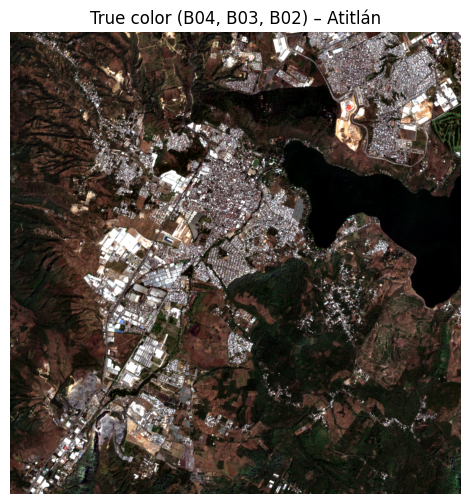

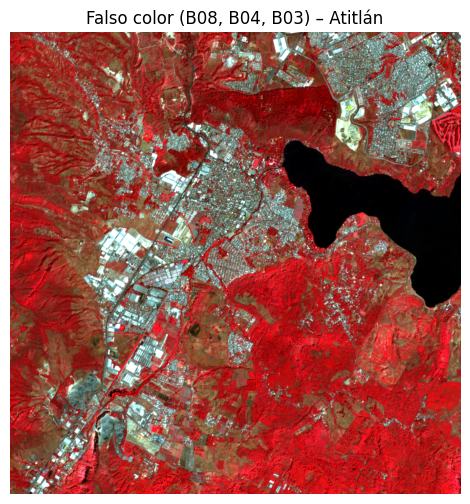

In [13]:
def normalize(b):
    b = b.astype("float32")
    valid = b[np.isfinite(b)]
    if valid.size == 0:
        return b
    p2, p98 = np.percentile(valid, (2, 98))
    return np.clip((b - p2) / (p98 - p2 + 1e-9), 0, 1)

blue  = bandas[0]
green = bandas[1]
red   = bandas[2]
nir   = bandas[3]

R = normalize(red)
G = normalize(green)
B = normalize(blue)

rgb_true = np.dstack([R, G, B])

plt.figure(figsize=(10,6))
plt.imshow(rgb_true)
plt.title("True color (B04, B03, B02) – Atitlán")
plt.axis('off')
plt.show()

N = normalize(nir)
rgb_false = np.dstack([N, R, G])

plt.figure(figsize=(10,6))
plt.imshow(rgb_false)
plt.title("Falso color (B08, B04, B03) – Atitlán")
plt.axis('off')
plt.show()


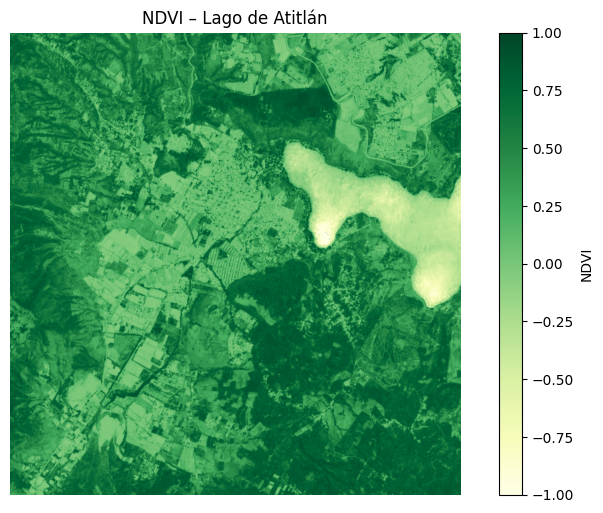

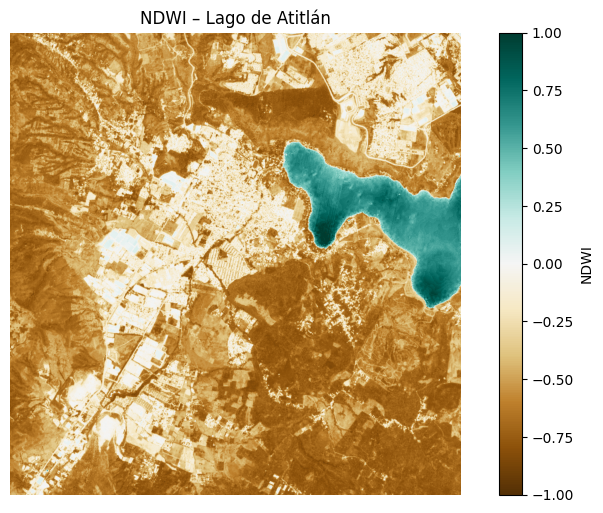

In [14]:
scale = 10000.0
red_f  = red.astype("float32")  / scale
nir_f  = nir.astype("float32")  / scale
green_f= green.astype("float32")/ scale
blue_f = blue.astype("float32") / scale

ndvi_atitlan = np.where(
    (nir_f + red_f) == 0, np.nan,
    (nir_f - red_f) / (nir_f + red_f)
)

plt.figure(figsize=(10,6))
plt.imshow(ndvi_atitlan, cmap='YlGn', vmin=-1, vmax=1)
plt.title("NDVI – Lago de Atitlán")
plt.colorbar(label="NDVI")
plt.axis('off')
plt.show()

ndwi_atitlan = np.where(
    (green_f + nir_f) == 0, np.nan,
    (green_f - nir_f) / (green_f + nir_f)
)

plt.figure(figsize=(10,6))
plt.imshow(ndwi_atitlan, cmap='BrBG', vmin=-1, vmax=1)
plt.title("NDWI – Lago de Atitlán")
plt.colorbar(label="NDWI")
plt.axis('off')
plt.show()


In [15]:
BANDS_FULL = ["B02","B03","B04","B05","B07","B8A","B11","B12"]
SCALE = 10000.0 

In [16]:
import openeo
from datetime import datetime, timedelta

connection = openeo.connect("https://openeo.dataspace.copernicus.eu").authenticate_oidc()

lago_atitlan = {"west": -91.349, "east": -91.0702, "south": 14.5971, "north": 14.7648}
lago_amatitlan = {"west": -90.66, "east": -90.58, "south": 14.43, "north": 14.51}

def dateranges(start, end, step_days=4):
    """Genera ventanas [d, d+step] para buscar escenas limpias."""
    d0 = datetime.fromisoformat(start)
    d1 = datetime.fromisoformat(end)
    cur = d0
    out = []
    while cur <= d1:
        s = cur.date().isoformat()
        e = (cur + timedelta(days=step_days)).date().isoformat()
        out.append([s, e])
        cur += timedelta(days=step_days+1)
    return out

fechas_atitlan    = dateranges("2025-02-01", "2025-02-25", step_days=3)
fechas_amatitlan  = dateranges("2025-02-01", "2025-02-25", step_days=3)

def download_s2_cube(aoi, dates, title_prefix, out_dir="imgs"):
    os.makedirs(out_dir, exist_ok=True)
    saved = []
    for i,(start,end) in enumerate(dates, 1):
        cube = connection.load_collection(
            "SENTINEL2_L2A",
            spatial_extent=aoi,
            temporal_extent=[start, end],
            bands=BANDS_FULL
        )
        graph = cube.save_result(format="GTIFF")
        job = connection.create_job(graph, title=f"{title_prefix} {start}_{end}")
        job.start_and_wait()
        job.download_results(out_dir)
        tif = sorted(Path(out_dir).glob("*.tif"), key=lambda p: p.stat().st_mtime)[-1]
        mid_date = (datetime.fromisoformat(start) + (datetime.fromisoformat(end) - datetime.fromisoformat(start))/2).date().isoformat()
        saved.append((mid_date, str(tif)))
    return saved

tifs_at = download_s2_cube(lago_atitlan, fechas_atitlan,   "S2 Atitlan all bands")
tifs_am = download_s2_cube(lago_amatitlan, fechas_amatitlan, "S2 Amatitlan all bands")

len(tifs_at), len(tifs_am), tifs_at[:3], tifs_am[:3]



Authenticated using refresh token.
0:00:00 Job 'j-2508142240404fc986b3b30a3770018d': send 'start'
0:00:13 Job 'j-2508142240404fc986b3b30a3770018d': created (progress 0%)
0:00:18 Job 'j-2508142240404fc986b3b30a3770018d': created (progress 0%)
0:00:25 Job 'j-2508142240404fc986b3b30a3770018d': created (progress 0%)
0:00:33 Job 'j-2508142240404fc986b3b30a3770018d': running (progress N/A)
0:00:43 Job 'j-2508142240404fc986b3b30a3770018d': running (progress N/A)
0:00:56 Job 'j-2508142240404fc986b3b30a3770018d': running (progress N/A)
0:01:11 Job 'j-2508142240404fc986b3b30a3770018d': running (progress N/A)
0:01:31 Job 'j-2508142240404fc986b3b30a3770018d': running (progress N/A)
0:01:55 Job 'j-2508142240404fc986b3b30a3770018d': running (progress N/A)
0:02:25 Job 'j-2508142240404fc986b3b30a3770018d': running (progress N/A)
0:03:02 Job 'j-2508142240404fc986b3b30a3770018d': finished (progress 100%)


C:\Users\diego\AppData\Local\Temp\ipykernel_3492\4138619030.py:38: UserDeprecationWarning: Call to deprecated method download_results. (Instead use `BatchJob.get_results` and the more flexible download functionality of `JobResults`) -- Deprecated since version 0.4.10.
  job.download_results(out_dir)


0:00:00 Job 'j-250814224550444281109855b01d6e3a': send 'start'
0:00:14 Job 'j-250814224550444281109855b01d6e3a': created (progress 0%)
0:00:19 Job 'j-250814224550444281109855b01d6e3a': running (progress N/A)
0:00:26 Job 'j-250814224550444281109855b01d6e3a': running (progress N/A)
0:00:34 Job 'j-250814224550444281109855b01d6e3a': running (progress N/A)
0:00:44 Job 'j-250814224550444281109855b01d6e3a': running (progress N/A)
0:00:57 Job 'j-250814224550444281109855b01d6e3a': running (progress N/A)
0:01:12 Job 'j-250814224550444281109855b01d6e3a': running (progress N/A)
0:01:31 Job 'j-250814224550444281109855b01d6e3a': running (progress N/A)
0:01:56 Job 'j-250814224550444281109855b01d6e3a': running (progress N/A)
0:02:26 Job 'j-250814224550444281109855b01d6e3a': finished (progress 100%)
0:00:00 Job 'j-25081422511849b39430107343564456': send 'start'
0:00:13 Job 'j-25081422511849b39430107343564456': created (progress 0%)
0:00:18 Job 'j-25081422511849b39430107343564456': created (progress 0%)

JobFailedException: Batch job 'j-2508142317354c7cb93635bd27f01167' didn't finish successfully. Status: error (after 0:01:55).

In [ ]:
import rasterio
import numpy as np

def load_bands(tif_path: str):
    with rasterio.open(tif_path) as src:
        data = src.read() 
        nodata = src.nodata
    B02 = data[0].astype("float32"); B03 = data[1].astype("float32")
    B04 = data[2].astype("float32"); B05 = data[3].astype("float32")
    B07 = data[4].astype("float32"); B8A = data[5].astype("float32")
    B11 = data[6].astype("float32"); B12 = data[7].astype("float32")
    return dict(B02=B02, B03=B03, B04=B04, B05=B05, B07=B07, B8A=B8A, B11=B11, B12=B12), nodata

bands_atitlan, nodata_at = load_bands(tifs_at)
bands_amatitlan, nodata_am = load_bands(tifs_am)


In [ ]:
def to_reflectance(b, nodata=None, scale=SCALE):
    out = b.astype("float32")
    if nodata is not None:
        out = np.where(b == nodata, np.nan, out)
    return out / scale

def scale_all(bands, nodata=None):
    return {k: to_reflectance(v, nodata=nodata) for k,v in bands.items()}

R_at  = scale_all(bands_atitlan,  nodata=nodata_at)
R_am  = scale_all(bands_amatitlan, nodata=nodata_am)


In [ ]:
def water_mask(R):
    B02, B03, B04, B05, B07, B8A, B11, B12 = R["B02"], R["B03"], R["B04"], R["B05"], R["B07"], R["B8A"], R["B11"], R["B12"]
    ndwi  = (B03 - B8A) / (B03 + B8A + 1e-9)
    mndwi = (B03 - B11) / (B03 + B11 + 1e-9)
    aweish  = B02 + 2.5*B03 - 1.5*(B8A + B11) - 0.25*B12
    aweinsh = 4*(B03 - B11) - (0.25*B8A + 2.75*B11)
    ndvi = (B8A - B04) / (B8A + B04 + 1e-9)
    dbsi = ((B11 - B03) / (B11 + B03 + 1e-9)) - ndvi
    ws = ( (mndwi > 0.42) | (ndwi > 0.40) | (aweinsh > 0.1879) | (aweish > 0.1112) | (ndvi < -0.2) )
    ws = ws & ~((aweinsh <= -0.03) | (dbsi > 0))
    return ws


mask_water_at = water_mask(R_at)
mask_water_am = water_mask(R_am)


In [ ]:

def NDVI(R):
    B04, B8A = R["B04"], R["B8A"]
    return (B8A - B04) / (B8A + B04 + 1e-9)

def NDWI(R):
    B03, B8A = R["B03"], R["B8A"]
    return (B03 - B8A) / (B03 + B8A + 1e-9)

def FAI(B04, B07, B8A):
    return (B07 - (B04 + (B8A - B04) * (783 - 665) / (865 - 665)))

def NDCI(R):
    B04, B05 = R["B04"], R["B05"]
    return (B05 - B04) / (B05 + B04 + 1e-9)

def chl_exp(ndci):
    return 17.441 * np.exp(4.7038 * ndci)

def chlorophyll_map(R, mask_water, use_exp=True, exclude_floating=True):
    ndci = NDCI(R)
    fai = FAI(R["B04"], R["B07"], R["B8A"])
    chl = chl_exp(ndci) if use_exp else ndci  
    chl = np.where(chl>500, np.nan, chl)
    chl = np.where(mask_water, chl, np.nan)
    if exclude_floating:
        chl = np.where(fai > 0.08, np.nan, chl)
    return chl, ndci, fai

def compute_FAI_NDCI(R):
    return FAI(R["B04"], R["B07"], R["B8A"]), NDCI(R)

FAI_at, NDCI_at = compute_FAI_NDCI(R_at)
FAI_am, NDCI_am = compute_FAI_NDCI(R_am)


In [ ]:
def chl_exp(ndci):
    return 17.441 * np.exp(4.7038 * ndci)

def chl_poly(ndci):
    return 826.57*(ndci**3) - 176.43*(ndci**2) + 19*ndci + 4.071


In [ ]:
import matplotlib.pyplot as plt

def show_chl(chl, title):
    plt.figure(figsize=(8,6))
    plt.imshow(chl, cmap="viridis", vmin=np.nanpercentile(chl,5), vmax=np.nanpercentile(chl,95))
    cbar = plt.colorbar(label="Chl-a (mg/m³, aprox.)")
    plt.title(title)
    plt.axis("off")
    plt.show()


def summarize_chl(chl):
    arr = chl[np.isfinite(chl)]
    if arr.size == 0:
        return dict(mean=np.nan, median=np.nan, p25=np.nan, p75=np.nan, n=0)
    return dict(
        mean=float(arr.mean()),
        median=float(np.median(arr)),
        p25=float(np.percentile(arr,25)),
        p75=float(np.percentile(arr,75)),
        n=int(arr.size)
    )

def mean_over_water(index_array, water_mask):
    arr = np.where(water_mask, index_array, np.nan)
    return float(np.nanmean(arr))

sum_at = summarize_chl(chl_at)
sum_am = summarize_chl(chl_am)
sum_at, sum_am


In [ ]:
def process_scene(tif_path: str, lake_name: str, scene_date: str):
    bands, nodata = load_bands(tif_path)
    R = scale_all(bands, nodata=nodata)
    ws = water_mask(R)
    chl, ndci, fai = chlorophyll_map(R, ws, use_exp=True, exclude_floating=True)
    # NDVI/NDWI medios (sobre agua)
    ndvi = NDVI(R)
    ndwi = NDWI(R)
    ndvi_mean = mean_over_water(ndvi, ws)
    ndwi_mean = mean_over_water(ndwi, ws)
    # Resumen clorofila
    s = summarize_chl(chl)
    return {
        "date": scene_date,
        "lake": lake_name,
        "chl_mean": s["mean"], "chl_median": s["median"], "chl_p25": s["p25"], "chl_p75": s["p75"],
        "ndvi_mean": ndvi_mean, "ndwi_mean": ndwi_mean
    }, chl

rows = []
latest_maps = {"Atitlán": None, "Amatitlán": None}

# Atitlán
for d, tif in tifs_at:
    try:
        row, chl_map = process_scene(tif, "Atitlán", d)
        rows.append(row)
        latest_maps["Atitlán"] = chl_map 
    except Exception as e:
        print("Error Atitlán", d, e)

# Amatitlán
for d, tif in tifs_am:
    try:
        row, chl_map = process_scene(tif, "Amatitlán", d)
        rows.append(row)
        latest_maps["Amatitlán"] = chl_map
    except Exception as e:
        print("Error Amatitlán", d, e)

df = pd.DataFrame(rows)
df["date"] = pd.to_datetime(df["date"])
df = df.sort_values(["lake","date"]).reset_index(drop=True)
df.head(), df.tail(), df.shape


In [ ]:
csv_path = "chl_timeseries_init.csv"
df.to_csv(csv_path, index=False, encoding="utf-8")
csv_path


## 6.2 Gráfico de evolución temporal y 6.3 picos/fechas críticas

In [ ]:
from IPython.display import display

plt.figure(figsize=(9,5))
for lake, g in df.groupby("lake"):
    plt.plot(g["date"], g["chl_mean"], marker="o", label=lake)
plt.title("Evolución temporal de clorofila-a por lago")
plt.xlabel("Fecha"); plt.ylabel("Clorofila-a media (mg/m³)")
plt.grid(True, alpha=0.3); plt.legend(); plt.tight_layout()
plt.show()

peaks = []
for lake, g in df.groupby("lake"):
    thr = g["chl_mean"].quantile(0.75)
    pk = g[g["chl_mean"] >= thr][["date","lake","chl_mean"]].copy()
    pk["threshold"] = thr
    peaks.append(pk)
peaks = pd.concat(peaks).sort_values("date")
print("Posibles picos de floración (≥ p75 por lago):")
display(peaks)


## 7.1 y 7.2 Mapas espaciales (última escena de cada lago y comparativos)

In [ ]:
def show_chl(chl, title):
    plt.figure(figsize=(8,6))
    vmin = np.nanpercentile(chl, 5)
    vmax = np.nanpercentile(chl, 95)
    plt.imshow(chl, cmap="viridis", vmin=vmin, vmax=vmax)
    plt.colorbar(label="Chl-a (mg/m³, aprox.)")
    plt.title(title); plt.axis("off"); plt.tight_layout(); plt.show()

if latest_maps["Atitlán"] is not None:
    show_chl(latest_maps["Atitlán"], "Clorofila-a (última fecha) · Atitlán")
if latest_maps["Amatitlán"] is not None:
    show_chl(latest_maps["Amatitlán"], "Clorofila-a (última fecha) · Amatitlán")


In [ ]:
def get_tif_for_date(tif_list, target_date_iso):
    for d, tif in tif_list:
        if d == target_date_iso:
            return tif
    return None

def plot_compare(lake_name, tif_list, date_a, date_b):
    tif_a = get_tif_for_date(tif_list, date_a)
    tif_b = get_tif_for_date(tif_list, date_b)
    if not tif_a or not tif_b:
        print(f"No se encontraron TIFs para {lake_name} en {date_a} / {date_b}")
        return
    bands_a, na_a = load_bands(tif_a); Ra = scale_all(bands_a, nodata=na_a); wa = water_mask(Ra)
    bands_b, na_b = load_bands(tif_b); Rb = scale_all(bands_b, nodata=na_b); wb = water_mask(Rb)
    chla, *_ = chlorophyll_map(Ra, wa); chlb, *_ = chlorophyll_map(Rb, wb)

    vmin = np.nanpercentile(np.concatenate([chla[~np.isnan(chla)], chlb[~np.isnan(chlb)]]), 5)
    vmax = np.nanpercentile(np.concatenate([chla[~np.isnan(chla)], chlb[~np.isnan(chlb)]]), 95)

    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    plt.imshow(chla, cmap="viridis", vmin=vmin, vmax=vmax)
    plt.title(f"{lake_name} · {date_a}"); plt.axis("off")
    plt.subplot(1,2,2)
    plt.imshow(chlb, cmap="viridis", vmin=vmin, vmax=vmax)
    plt.title(f"{lake_name} · {date_b}"); plt.axis("off")
    plt.tight_layout(); plt.show()

if len(tifs_at) >= 2:
    plot_compare("Atitlán", tifs_at, tifs_at[0][0], tifs_at[-1][0])
if len(tifs_am) >= 2:
    plot_compare("Amatitlán", tifs_am, tifs_am[0][0], tifs_am[-1][0])


## 8 Correlación NDVI/NDWI vs Clorofila-a

In [ ]:
print("Correlación global Chl-a vs NDVI:", df["chl_mean"].corr(df["ndvi_mean"]))
print("Correlación global Chl-a vs NDWI:", df["chl_mean"].corr(df["ndwi_mean"]))

for lake, g in df.groupby("lake"):
    print(f"[{lake}] corr(Chl, NDVI)={g['chl_mean'].corr(g['ndvi_mean']):.2f}  corr(Chl, NDWI)={g['chl_mean'].corr(g['ndwi_mean']):.2f}")

plt.figure(figsize=(6,5))
plt.scatter(df["ndvi_mean"], df["chl_mean"])
plt.xlabel("NDVI medio"); plt.ylabel("Clorofila-a media (mg/m³)")
plt.grid(True, alpha=0.3); plt.title("Chl-a vs NDVI"); plt.tight_layout(); plt.show()

plt.figure(figsize=(6,5))
plt.scatter(df["ndwi_mean"], df["chl_mean"])
plt.xlabel("NDWI medio"); plt.ylabel("Clorofila-a media (mg/m³)")
plt.grid(True, alpha=0.3); plt.title("Chl-a vs NDWI"); plt.tight_layout(); plt.show()


## 9. Análisis y comparación entre lago

In [ ]:
summary_by_lake = df.groupby("lake")["chl_mean"].agg(["count","mean","median","min","max"])
display(summary_by_lake)

bloom_flags = []
for lake, g in df.groupby("lake"):
    thr = g["chl_mean"].quantile(0.75)
    bloom_flags.append((lake, int((g["chl_mean"]>=thr).sum()), float(thr)))
pd.DataFrame(bloom_flags, columns=["lake","bloom_count","p75_threshold"])
